<a href="https://colab.research.google.com/github/ovictormiranda/COMPUTER_VISION_SOCCER/blob/main/MVP_Computer_vision_PUCRIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MVP - Vis√£o Computacional aplicada ao Futebol**


## **Introdu√ß√£o**
O futebol tem se beneficiado do avan√ßo tecnol√≥gico, especialmente na an√°lise de dados que potencializa estrat√©gias. Grandes quantidades de dados s√£o coletadas de ligas e campeonatos por players como a SofaScore, WyScout e InStat. No entanto, a coleta geralmente √© feita manualmente por analistas de jogos que marcam a√ß√µes dos jogadores em campo durante as partidas. Embora esses dados alimentem estat√≠sticas interessantes, eles s√£o gen√©ricos e n√£o t√£o espec√≠ficos para os clubes. Clubes tamb√©m realizam suas pr√≥prias coletas de dados, muitas vezes usando dispositivos GPS em cada jogador, mas esses dados s√£o limitados ao pr√≥prio clube.

A vis√£o computacional desempenha um papel fundamental na tomada de decis√µes e no desenvolvimento de estrat√©gias no futebol. Antes e durante o jogo, os treinadores, especialmente os adeptos da escola europeia, contam com equipes de analistas de desempenho e estrat√©gia. Esses profissionais se dedicam a analisar os pontos fortes e vulnerabilidades do advers√°rio, bem como a melhorar o desempenho de sua pr√≥pria equipe, muitas vezes focando em aspectos espec√≠ficos como jogadas de bola parada. No entanto, esse processo consome horas de revis√£o de jogos para extrair insights e preparar relat√≥rios para os treinadores, visando planejar estrat√©gias vencedoras para o pr√≥ximo jogo.

A aplica√ß√£o da vis√£o computacional nesse contexto pode otimizar significativamente esse processo. Al√©m do rastreamento de jogadores e da an√°lise de estat√≠sticas como dist√¢ncias percorridas e velocidade, a vis√£o computacional pode ser utilizada para detectar espa√ßos entre linhas e na profundidade, tanto em situa√ß√µes de ataque quanto de defesa. Al√©m disso, permite mapear o posicionamento dos jogadores de acordo com as estrat√©gias definidas, garantindo que a equipe esteja alinhada com o plano t√°tico tra√ßado. No futebol posicional, onde a ocupa√ß√£o correta de espa√ßos √© fundamental, essa capacidade de monitoramento e an√°lise √© de extrema import√¢ncia para o sucesso da equipe.

Considerando esses aspectos, decidi criar um MVP focado na detec√ß√£o e rastreamento de elementos-chave do jogo, como a bola, jogadores, goleiros e a equipe de arbitragem. Al√©m disso, o sistema ser√° capaz de identificar as equipes com base na cor das camisas dos jogadores.

##**Fonte de dados**
O dataset foi adquirido no Roboflow e consiste em imagens de transmiss√µes televisivas de partidas de futebol, totalizando 663 imagens.
https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/1

**Caracter√≠sticas:**

* 663 imagens dispon√≠veis.
* Imagens capturadas durante transmiss√µes televisivas de jogos de futebol.
* Alta variedade de cen√°rios e situa√ß√µes de jogo.
* Desafios incluem desbalanceamento na quantidade de jogadores, goleiros, equipe de arbitragem e a bola, al√©m de amplo plano de fundo nas imagens.

**Objetivo:**

O dataset tem como objetivo fornecer uma base para o treinamento e valida√ß√£o de modelos de detec√ß√£o de jogadores de futebol. Ele ser√° utilizado como parte do processo de finetuning do modelo YOLO (You Only Look Once), visando adaptar o modelo √†s caracter√≠sticas espec√≠ficas das imagens de jogos de futebol.

Na pasta 'input_videos', utilizei um v√≠deo retirado de um dataset dispon√≠vel no Kaggle. Como o objetivo principal do projeto √© a an√°lise de partidas de futebol em v√≠deo, optei por selecionar este v√≠deo para simular o funcionamento pr√°tico do MVP.

Voc√™ pode acessar o dataset completo atrav√©s do seguinte link: https://www.kaggle.com/competitions/dfl-bundesliga-data-shootout/data


# **1. Prepara√ß√£o do Ambiente**

Antes de iniciarmos, √© necess√°rio instalar as depend√™ncias necess√°rias para o projeto. Para isso, precisaremos das bibliotecas Ultralytics, Roboflow, OpenCV-Python e Supervision.

In [1]:
!pip install ultralytics
!pip install roboflow
!pip install opencv-python
!pip install supervision


Ap√≥s a conclus√£o das instala√ß√µes, estamos prontos para importar as bibliotecas necess√°rias para o projeto.

In [2]:
import os
from google.colab import drive
import shutil

from ultralytics import YOLO
from roboflow import Roboflow
import supervision as sv
import cv2

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

Vamos manipular alguns dados que est√£o armazenados neste drive, ent√£o precisaremos mont√°-lo para termos acesso ao Google Drive.

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Agora que temos acesso aos Google Drive, vamos criar uma estrutura de pastas pro nosso projeto.
Essas ser√£o as principais pastas do nosso projeto, e podemos dizer que a pasta raiz √© a soccer_analysis.

**soccer_analysis**

    input_videos
    models
    output_videos
    runs
    stubs
    training

Essa √© a estrutura de pastas completa do nosso projeto.

**soccer_analysis**

    input_videos

    models

    output_videos
    
    runs
        detect
            train
                weights
            train2
                weights
        predict
    
    stubs
    
    training
        football-players-detection-1
            football-players-detection-1
                test
                    images
                    labels
                train
                    images
                    labels
                valid
                    images
                    labels



Para facilitar, vamos preparar previamente as pastas que receber√£o as informa√ß√µes. Al√©m disso, armazenaremos o caminho do diret√≥rio raiz para facilitar o acesso aos arquivos. Isso √© importante para evitar a repeti√ß√£o desse caminho toda vez que acessarmos algum arquivo no Google Drive, o que nos ajudar√° a navegar pelas pastas do projeto.

In [6]:
ROOT_DIR = '/content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis'

In [ ]:

#Definindo o 'endere√ßo' dos paths
'''
models_path = (ROOT_DIR + '/models')
output_videos_path = (ROOT_DIR + '/output_videos_path')
runs_path = (ROOT_DIR + '/runs')
detect_path = (runs_path + '/detect')
stubs_path = (ROOT_DIR + '/stubs')
training_path = (ROOT_DIR + '/training')
trained_path = (training_path + '/football-players-detection-1')
'''

#Criando os paths
'''
os.makedirs(models_path, exist_ok=True)
os.makedirs(output_videos_path, exist_ok=True)
os.makedirs(runs_path, exist_ok=True)
os.makedirs(detect_path, exist_ok=True)
os.makedirs(stubs_path, exist_ok=True)
os.makedirs(training_path, exist_ok=True)
os.makedirs(trained_path, exist_ok=True)
'''

O c√≥digo acima est√° comentado, porque o projeto j√° est√° com as pastas criadas.

#**2. Introdu√ß√£o a YOLO e Processamento de v√≠deo**


Um dos algoritmos mais populares e eficazes para detec√ß√£o de objetos em tempo real √© o YOLO (You Only Look Once).

Utilza uma abordagem de detec√ß√£o de objetos baseada em redes neurais convolucionais (CNNs). O que o torna √∫nico √© que ele aborda o problema de detec√ß√£o de objetos como um problema de regress√£o de caixa delimitadora, em vez de abordagens baseadas em regi√µes propostas, como R-CNN. Isso permite que o YOLO seja extremamente r√°pido, capaz de detectar objetos em tempo real em v√≠deos e imagens.


In [8]:
model_initial = YOLO('yolov8x')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 131M/131M [00:00<00:00, 207MB/s]


As fun√ß√µes apresentadas abaixo utilizam o YOLO para realizar tarefas importantes no processamento de v√≠deo, como detec√ß√£o de objetos e captura de frames.

* **predict_test:** Esta fun√ß√£o utiliza um modelo pr√©-treinado da YOLO para realizar previs√µes em um v√≠deo espec√≠fico. Seu objetivo √© identificar e delimitar objetos de interesse em cada frame do v√≠deo, fornecendo informa√ß√µes sobre suas coordenadas e classes.

* **capture_frame:** Essa fun√ß√£o √© respons√°vel por capturar um frame de um v√≠deo e exibi-lo como uma imagem. Ela permite visualizar o conte√∫do de um frame espec√≠fico para inspe√ß√£o visual ou an√°lise manual.

In [4]:
# Fun√ß√£o para efetuar predi√ß√£o utilizando o modelo pr√© treinado da YOLO puro
def predict_test(model, video_path):
  results = model.predict(source=video_path, save=True)
  print(results[0])
  print('=====================================')
  for box in results[0].boxes:
    print(box)


# Fun√ß√£o para capturar um frame e exibi-lo como uma imagem
def capture_frame(video_path):
    cap = cv2.VideoCapture(video_path)

    # Verificando se o v√≠deo foi aberto corretamente
    if not cap.isOpened():
        print("Erro ao abrir o v√≠deo.")
        return

    # Capturar o primeiro frame do v√≠deo
    ret, frame = cap.read()

    # Verificar se o frame foi capturado corretamente
    if not ret:
        print("Erro ao capturar o frame.")
        return

    # Convertendo o frame para RGB (OpenCV carrega frames em BGR por padr√£o)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Ajustar o tamanho da figura
    plt.figure(figsize=(12, 10))

    plt.imshow(frame_rgb)
    plt.axis('off')  # Desativar os eixos
    plt.show()

    # Fechar o objeto de captura
    cap.release()

In [9]:
#Caminho do video
video_path = os.path.join(ROOT_DIR, 'input_videos/08fd33_4.mp4')

predict_test(model_initial, video_path)



WARNING ‚ö†Ô∏è inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/750) /content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/input_videos/08fd33_4.mp4: 384x640 23 persons, 1 sports ball, 2872.0ms
video 1/1 (frame 2/750) /content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/input_videos/08fd33_4.mp4: 384x640 23 persons, 1 sports ball, 3009.1ms
video 1/1 (frame 3/750) /content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/input_videos/08fd33_4.mp4: 384x640 25 perso

No log acima, podemos visualizar as a√ß√µes do modelo e as detec√ß√µes que ele realiza a cada frame do v√≠deo. Os resultados dessa predi√ß√£o s√£o salvos no diret√≥rio runs/detect/predict, com o nome do arquivo sendo o mesmo do v√≠deo. Para garantir o acesso cont√≠nuo a essas informa√ß√µes e resultados, √© necess√°rio mover os dados para uma pasta sob nosso controle, que ser√° a pasta soccer_analytics/runs/detect/predict.

In [10]:
# Caminho dentro do nosso projeto, para guardarmos o resultado
path_predict_test = os.path.join(ROOT_DIR, 'runs/detect/predict')

# Mover os dados para a pasta
'''
shutil.move('/content/runs/detect', path_predict_test)
'''

"\nshutil.move('/content/runs/detect', path_predict_test)\n"


Voc√™ pode acessar o v√≠deo completo no seguinte caminho: soccer_analytics > runs > predict. No entanto, abaixo, vamos visualizar um frame dele para termos uma ideia do que estamos falando, sem precisar sair desta p√°gina.

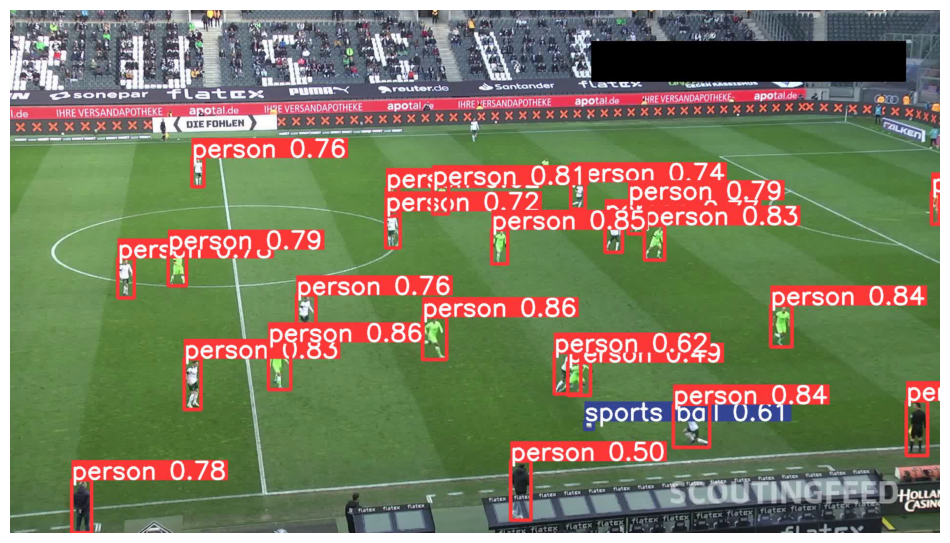

In [11]:
video_test_predict = os.path.join(ROOT_DIR, 'runs/detect/predict/08fd33_4.avi')
capture_frame(video_test_predict)

No registro de predi√ß√£o do modelo, obtemos a seguinte sa√≠da:

    ultralytics.engine.results.Results object with attributes:
    boxes: ultralytics.engine.results.Boxes object
    keypoints: None
    masks: None
    names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

As chaves keypoints e masks est√£o como None porque s√£o utilizadas para pose estimation e segmenta√ß√£o, respectivamente. O dicion√°rio names corresponde √†s op√ß√µes de detec√ß√£o dispon√≠veis pelo modelo YOLO. Para este projeto, estamos interessados apenas em detectar jogadores, √°rbitros (person) e a bola de futebol (sports ball).

E como exemplo, obtivemos esse resultado de predi√ß√£o:

    cls: tensor([0.], device='cuda:0')
    conf: tensor([0.8493], device='cuda:0')
    data: tensor([[9.9717e+02, 5.2244e+02, 1.0549e+03, 6.7972e+02, 8.4930e-01, 0.0000e+00]], device='cuda:0')
    id: None
    is_track: False
    orig_shape: (1080, 1920)
    shape: torch.Size([1, 6])
    xywh: tensor([[1026.0289,  601.0784,   57.7277,  157.2830]], device='cuda:0')
    xywhn: tensor([[0.5344, 0.5566, 0.0301, 0.1456]], device='cuda:0')
    xyxy: tensor([[ 997.1651,  522.4369, 1054.8928,  679.7199]], device='cuda:0')
    xyxyn: tensor([[0.5194, 0.4837, 0.5494, 0.6294]], device='cuda:0')
    


A detec√ß√£o de objetos √© realizada utilizando bounding boxes, que determinam a localiza√ß√£o do objeto dentro da imagem (neste caso, do quadro do v√≠deo) por meio de coordenadas x e y. Essas coordenadas apontam para o centro do objeto detectado, enquanto o tamanho do objeto √© dado pelas dimens√µes w e h (largura e altura, respectivamente). Uma alternativa √© utilizar as coordenadas dos v√©rtices superior esquerdo (top-left) e inferior direito (bottom-right) da bounding box, e √© essa estrat√©gia que adotaremos neste projeto (formato xyxy).

√â importante destacar a rela√ß√£o entre frames e segundos no v√≠deo. Um v√≠deo consiste em uma sequ√™ncia de imagens, onde v√°rias imagens s√£o exibidas por segundo. Ao detectar um objeto em um v√≠deo, √© necess√°rio identific√°-lo em cada um desses frames sucessivos.

Quando id: None e is_Track: False s√£o exibidos em uma predi√ß√£o, isso significa que os objetos n√£o est√£o recebendo identificadores √∫nicos e tamb√©m n√£o est√£o sendo rastreados durante as transi√ß√µes de frames. Cada frame do v√≠deo √© tratado como uma imagem separada, e a detec√ß√£o precisa ser feita e rastreada em cada uma dessas imagens individualmente.

In [ ]:
# A celula est√° comentada porque j√° foi realizada a transfer√™ncia
'''
shutil.move('/content/runs', ROOT_DIR)
'''

'/content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/runs'

#**3. Fine-tuning**



Para alcan√ßarmos os objetivos deste MVP, nos deparamos com alguns desafios. O modelo gen√©rico do YOLO possui a capacidade de identificar uma ampla variedade de classes, no entanto, para esta aplica√ß√£o espec√≠fica, essa generalidade n√£o √© ideal.

Ao analisarmos visualmente o v√≠deo com os bounding boxes projetados, observamos algumas quest√µes que precisam ser abordadas. Em primeiro lugar, notamos que o modelo est√° identificando pessoas de forma gen√©rica, sem distinguir entre jogadores, √°rbitros, goleiros. Precisamos que essas 'pessoas' deixem de serem apenas 'pessoas', e recebam suas devidas classes.

Al√©m disso, o modelo est√° detectando pessoas que est√£o fora do campo de jogo. Essas detec√ß√µes s√£o irrelevantes para nossa an√°lise e podem introduzir ru√≠do nos resultados. Portanto, o modelo precisa ser ajustado para ignorar essas detec√ß√µes fora do campo.

Para superar esses desafios, aplicare,p uma t√©cnica chamada fine-tuning. O fine-tuning envolve ajustar um modelo pr√©-treinado para se adequar melhor aos requisitos espec√≠ficos de um problema ou aplica√ß√£o. Utilizando o dataset da Roboflow, que mencionamos anteriormente e que possui quatro classes:

    Jogador (Player)
    Goleiro (Goalkeeper)
    Bola (Ball)
    √Årbitro (Referee)

Ao aplicar o fine-tuning, esperamos melhorar significativamente a capacidade do nosso modelo em diferenciar entre essas classes e, assim, aprimorar a qualidade das an√°lises de v√≠deos de futebol.

##**3.1 Treinamento**

E para ter acesso a essas dados, precisamos baixa-los utilizando o c√≥digo abaixo.

In [ ]:
#Cod√≠go gerado pelo Roboflow
rf = Roboflow(api_key="6lXI5l5ZiKgkA6hd1z1P") #esse hash √© unico
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-1 in yolov5pytorch:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1338/1338 [00:00<00:00, 3048.89it/s]


Agora que j√° foi feito o download, vamos mover os dados para a pasta do projeto.

In [ ]:
# As celulas est√£o comentadas porque j√° foi realizada a transfer√™ncia
'''
shutil.move('/content/football-players-detection-1', (ROOT_DIR + '/training'))
'''

'/content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/training/football-players-detection-1'

O processo de mover pastas entre diret√≥rios no Google Drive pode ser um pouco demorado. Embora o comando seja executado rapidamente, ainda √© necess√°rio aguardar o tempo necess√°rio para o Google Drive transferir os arquivos para o novo local. Isso geralmente leva entre 7 e 10 minutos, mas o tempo pode variar dependendo da velocidade da conex√£o com a internet.


In [ ]:
# As celulas est√£o comentadas porque j√° foi realizada a transfer√™ncia
'''
shutil.move((ROOT_DIR + '/training/football-players-detection-1/train'),
             (ROOT_DIR + 'football-players-detection-1/football-players-detection-1/train'))

shutil.move((ROOT_DIR + '/training/football-players-detection-1/test'),
             (ROOT_DIR + '/training/football-players-detection-1/football-players-detection-1/test'))

shutil.move((ROOT_DIR + '/training/football-players-detection-1/valid'),
             (ROOT_DIR + '/training/football-players-detection-1/football-players-detection-1/valid'))
'''

'/content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/training/football-players-detection-1/football-players-detection-1/valid'

Essa segunda etapa de transfer√™ncia de pastas entre diret√≥rios √© necess√°ria porque o arquivo data.yaml precisa estar em um diret√≥rio anterior aos diret√≥rios de treinamento, teste e valida√ß√£o.

Essa linha de c√≥digo realiza o fine-tuning do modelo YOLO utilizando o dataset baixado do Roboflow. Vamos entender cada um dos par√¢metros:

    !yolo: Este √© o comando utilizado para iniciar o processo de treinamento com o YOLO.
    task=detect: Define a tarefa que o YOLO deve executar durante o treinamento, que neste caso √© a detec√ß√£o de objetos.
    mode=train: Indica que estamos realizando o treinamento do modelo.
    model=yolov5x.pt: Especifica o modelo pr√©-treinado que ser√° utilizado como ponto de partida para o fine-tuning. Neste caso, estamos utilizando o modelo YOLO na vers√£o 5x.
    data='/content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/training/football-players-detection-1/data.yaml': Define o caminho para o arquivo data.yaml, que cont√©m as informa√ß√µes necess√°rias para o treinamento, como a localiza√ß√£o das pastas contendo as imagens e os r√≥tulos de treinamento, teste e valida√ß√£o.
    epochs=100: Determina o n√∫mero de √©pocas que ser√£o utilizadas durante o treinamento, neste caso, s√£o 100 √©pocas.
    imgsz=640: Especifica o tamanho das imagens que ser√£o utilizadas durante o treinamento, sendo 640x640 pixels.

In [ ]:
!yolo task=detect mode=train model=yolov5x.pt data='/content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/training/football-players-detection-1/data.yaml' epochs=100 imgsz=640

PRO TIP üí° Replace 'model=yolov5x.pt' with new 'model=yolov5xu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

100% 186M/186M [00:00<00:00, 389MB/s]
Ultralytics YOLOv8.2.2 üöÄ Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov5x.pt, data=/content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/training/football-players-detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val

Agora que treinamos o modelo, vamos mover os dados gerados para a pasta do projeto.

In [ ]:
# As celulas est√£o comentadas porque j√° foi realizada a transfer√™ncia
'''
shutil.move('/content/runs/detect/train', (ROOT_DIR + '/runs/detect'))
'''

'/content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/runs/detect/train'

## **3.2 Resultados do modelo**


Ao realizar o treinamento do modelo, al√©m do modelo treinado que discutiremos posteriormente, s√£o gerados alguns dados que fornecem informa√ß√µes sobre o que foi produzido durante essa sess√£o de treinamento. Para facilitar a visualiza√ß√£o e an√°lise desses resultados, vamos criar uma fun√ß√£o para plotar imagens aqui no colab.

In [12]:
def plot_image(path_image):
  # Carregar a imagem usando o matplotlib
  image = mpimg.imread(path_image)

  plt.figure(figsize=(12, 10))

  # Exibir a imagem
  plt.imshow(image)
  plt.axis('off')  # Desativar os eixos
  plt.show()

Vamos analisar 3 dessas imagens, come√ßando pela matriz de confusao normalizada.


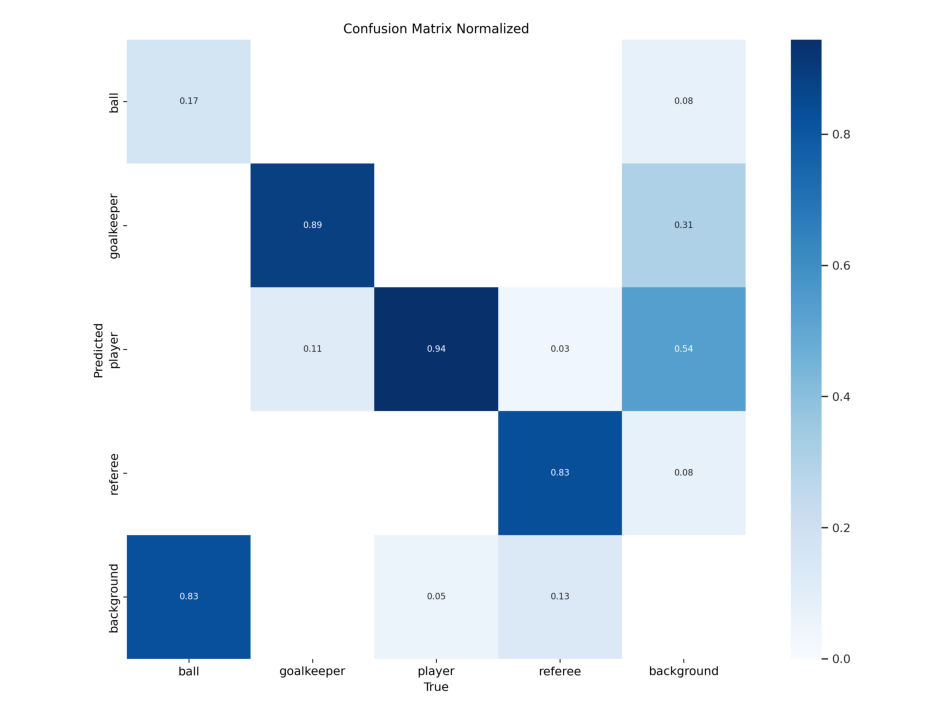

In [13]:
# Definindo path das imagens
path_confusion_matrix_norm = ROOT_DIR + '/runs/detect/train/confusion_matrix_normalized.png'
path_confusion_matrix = ROOT_DIR + '/runs/detect/train/confusion_matrix.png'
path_results = ROOT_DIR + '/runs/detect/train/results.png'

# Plotando as imagens
plot_image(path_confusion_matrix_norm)

Considerando a natureza dos dados, era esperada uma certa dificuldade na detec√ß√£o da bola. Isso se deve ao fato de termos uma amostragem muito pequena em compara√ß√£o com os outros objetos, e devido √† sua pequena dimens√£o em rela√ß√£o √† imagem como um todo, e faz com que a bola seja facilmente confundida com o backgrounds. No entanto, obtivemos resultados satisfat√≥rios na identifica√ß√£o de goleiros, √°rbitros e, principalmente, dos jogadores.

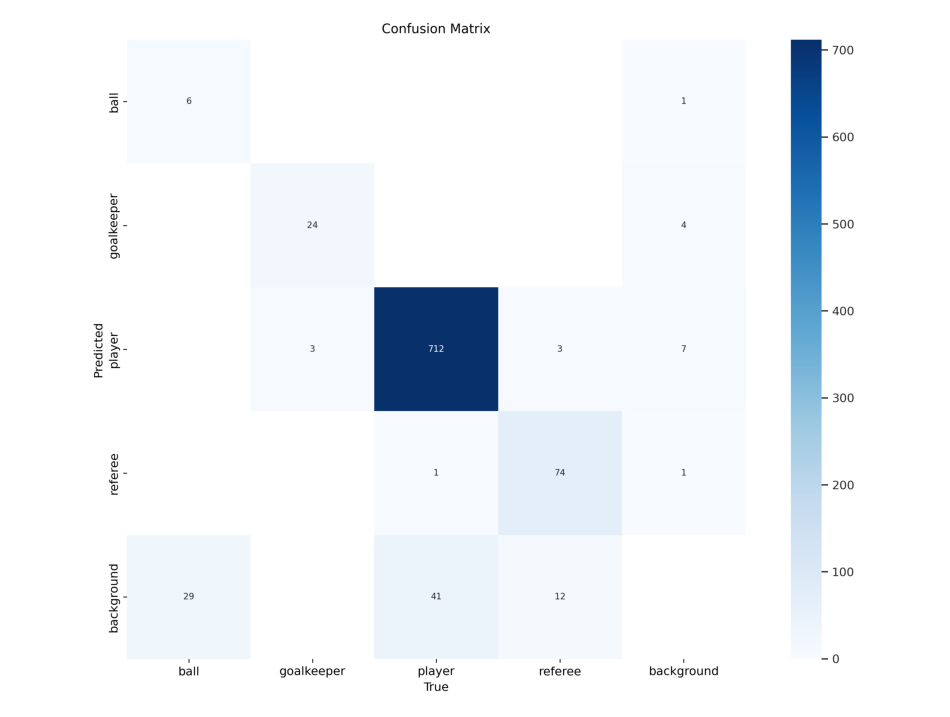

In [14]:
plot_image(path_confusion_matrix)

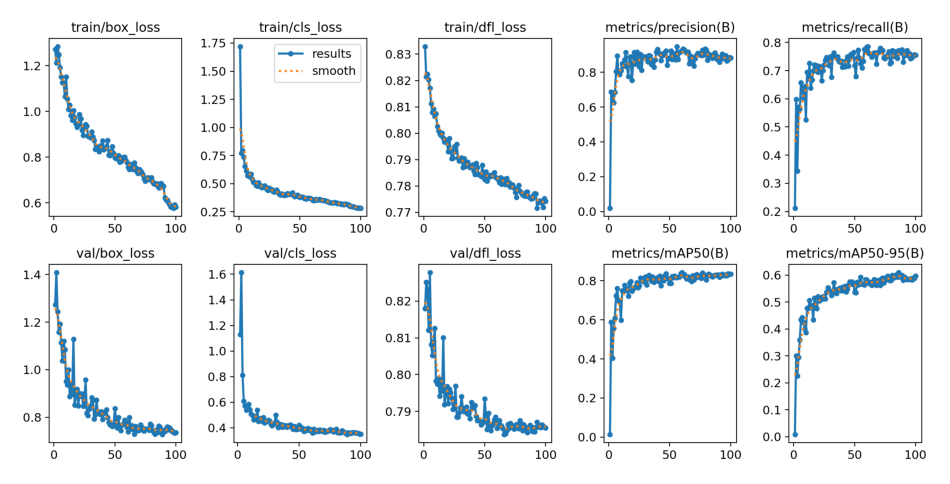

In [15]:
plot_image(path_results)


Ao analisar os gr√°ficos, podemos observar uma tend√™ncia positiva em rela√ß√£o √† qualidade dos treinamentos ao longo das √©pocas. As m√©tricas de loss, representadas pelos gr√°ficos de tran/box_loss, train/cls_loss e train/dfl_loss, mostram uma diminui√ß√£o gradual ao longo das √©pocas. Inicialmente, essas m√©tricas come√ßam em n√≠veis relativamente altos e diminuem conforme o treinamento avan√ßa. Isso indica que o modelo est√° aprendendo e se ajustando aos dados de treinamento, reduzindo assim as perdas associadas √† detec√ß√£o de caixas delimitadoras, classifica√ß√£o e outras caracter√≠sticas espec√≠ficas.

Por outro lado, as m√©tricas de precis√£o, representadas pelos gr√°ficos de metrics/precision(B), metrics/recall(B), metrics/mAP50(B) e metrics/mAP50-95(B), mostram uma tend√™ncia oposta. Essas m√©tricas come√ßam em n√≠veis mais baixos e aumentam √† medida que mais √©pocas s√£o acumuladas durante o treinamento. Isso indica que o modelo est√° melhorando sua capacidade de precis√£o na detec√ß√£o de objetos, aumentando tanto a precis√£o quanto a revoca√ß√£o e as m√©tricas de Average Precision (mAP). Essa melhoria na precis√£o ao longo das √©pocas sugere que o modelo est√° se tornando mais eficaz na identifica√ß√£o e classifica√ß√£o de objetos, resultando em uma melhor qualidade geral dos treinamentos.

Al√©m dessa informa√ß√µes, tamb√©m √© gerada uma pasta weights que contem o melhor e o ultimo modelo, e que iremos transferir para a pasta models

In [ ]:
# As celulas est√£o comentadas porque a transferencia j√° foi realizada
#Definido o caminho dos arquivos a serem copiados
'''
best_model = (ROOT_DIR + '/runs/detect/train/weights/best.pt')
last_model = (ROOT_DIR + '/runs/detect/train/weights/last.pt')
'''
#Copiano e colando
'''
shutil.copy(best_model, models_path) #o models_path foi criado no inicio do projeto
shutil.copy(last_model, models_path)
'''

'/content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/models/last.pt'

## **3.3 Modelo p√≥s fine-tuning**

In [ ]:
#utilizando o modelo treinado
model_tuning = YOLO(ROOT_DIR + '/models/best.pt')

video_path = os.path.join(ROOT_DIR, 'input_videos/08fd33_4.mp4')

predict_test(model_tuning, video_path)




WARNING ‚ö†Ô∏è inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/750) /content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/input_videos/08fd33_4.mp4: 384x640 1 ball, 1 goalkeeper, 18 players, 3 referees, 167.3ms
video 1/1 (frame 2/750) /content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/input_videos/08fd33_4.mp4: 384x640 1 ball, 1 goalkeeper, 18 players, 3 referees, 15.5ms
video 1/1 (frame 3/750) /content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/input_vi

Como j√° temos um video desse salvo, vamos renomear o arquivo antes para que o video nao seja sobrescrito.

In [ ]:
# A celula est√° comentada porque j√° foi realizada a transfer√™ncia
# Definir o caminho atual e o novo nome do arquivo
'''
file_to_rename = '/content/runs/detect/predict/08fd33_4.avi'
new_name = '08fd33_4(2).avi'

# Renomear o arquivo
os.rename(file_to_rename, os.path.join(os.path.dirname(file_to_rename), new_name))
'''

Agora, vamos mover para a pasta do projeto.

In [ ]:
# A celula est√° comentada porque j√° foi realizada a transfer√™ncia
'''
shutil.move('/content/runs/detect/predict/08fd33_4(2).avi', (ROOT_DIR + '/runs/detect/predict'))
'''

'/content/gdrive/My Drive/Computer_Vision_Project/soccer_analysis/runs/detect/predict/08fd33_4(2).avi'

Bom, √© poss√≠vel visualizar o video atrav√©s do caminho:

    soccer_analisys > runs > detect > predict

Mas de todo casa, vamos visualizar um frame desse video por aqui.

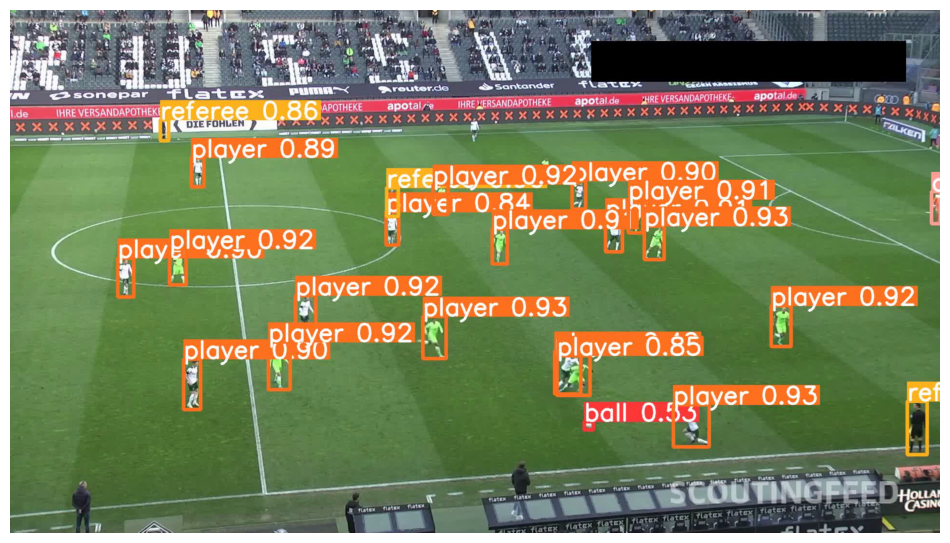

In [16]:
video_test_predict = os.path.join(ROOT_DIR, 'runs/detect/predict/08fd33_4(2).avi')
capture_frame(video_test_predict)


J√° podemos observar uma diferen√ßa significativa em rela√ß√£o √† predi√ß√£o anterior ao fine-tuning. Os objetos do jogo, que anteriormente eram classificados genericamente como 'person' e 'sports-ball', agora s√£o mais precisamente identificados como 'player', 'referee', 'goalkeeper' e 'ball'. Este √© apenas o primeiro passo, no entanto, ainda enfrentamos alguns desafios:

* **Limpeza:** A sa√≠da atual est√° polu√≠da com bounding boxes e r√≥tulos muito grandes. Para melhorar a visualiza√ß√£o, pretendemos substitu√≠-los por c√≠rculos posicionados sob os personagens.
* **Rastreamento de Objetos:** Al√©m de identificar as classes, o verdadeiro valor deste MVP reside no rastreamento e identifica√ß√£o dos personagens (player_id).
* **Identifica√ß√£o de Equipes:** √â crucial que possamos distinguir a qual equipe cada jogador pertence. Para isso, iremos identific√°-los com base na cor de suas camisas.
* **Rastreamento da Bola:** O rastreamento preciso da bola √© essencial para estimar a posse de bola de cada equipe. Como a bola √© √∫nica, n√£o precisamos atribuir a ela um 'ball_id'.
* **Desafio Extra:** Seria vantajoso aumentar a quantidade de amostras da bola no treinamento do modelo. Isso pode ser feito adicionando mais imagens com anota√ß√µes correspondentes ou utilizando t√©cnicas de data augmentation. Uma alternativa que exploraremos √© a interpola√ß√£o, que nos ajudar√° a manter o rastreamento da bola entre os frames. Essa t√©cnica funciona bem quando h√° pequenos intervalos de aus√™ncia de detec√ß√£o da bola, calculando sua trajet√≥ria entre os pontos detectados ao longo dos frames.

Vamos come√ßar criando uma aba para as fun√ßoes que utilizaremos para fazer leitura dos videos

#**4. Resolvendo os desafios**

##**4.1 Fun√ß√µes uteis**

Adicionamos duas fun√ß√µes essenciais para o processamento de v√≠deos em nosso projeto.

Essas fun√ß√µes ser√£o essenciais para a leitura e processamento dos v√≠deos em nosso projeto, permitindo-nos manipular os frames individualmente e salvar as sa√≠das geradas durante o processamento.

* **read_video**: L√™ o v√≠deo fornecido como entrada. Ela recebe o caminho do v√≠deo como argumento, inicializa um array de frames vazio e itera atrav√©s dos frames do v√≠deo. A cada itera√ß√£o, o frame √© lido e adicionado ao array de frames. Quando n√£o houver mais frames para ler, a fun√ß√£o retorna o array contendo todos os frames do v√≠deo.

* **save_video**: Salva uma sequ√™ncia de frames como um novo v√≠deo. Ela recebe como entrada os frames que comp√µem o v√≠deo e o caminho onde o novo v√≠deo deve ser salvo. A fun√ß√£o utiliza o codec XVID para a compress√£o do v√≠deo e escreve os frames no arquivo de v√≠deo de sa√≠da. Ao finalizar a escrita dos frames, o v√≠deo √© salvo no caminho especificado.

In [17]:
def read_video(video_path):
  cap = cv2.VideoCapture(video_path)
  frames = []
  while True:
    ret, frame = cap.read()
    if not ret:
      break
    frames.append(frame)
  return frames

def save_video(output_video_frames, output_video_path):
  fourcc = cv2.VideoWriter_fourcc(*'XVID')
  out = cv2.VideoWriter(output_video_path, fourcc, 24, (output_video_frames[0].shape[1], output_video_frames[0].shape[0]))
  for frame in output_video_frames:
    out.write(frame)
  out.release()

* **get_center_of_bounding_box:** Esta fun√ß√£o recebe as coordenadas de uma bounding box (caixa delimitadora) na forma (x1, y1, x2, y2) e calcula o ponto central da bounding box. Ela retorna as coordenadas (x, y) do centro da bounding box.
  
* **get_bounding_box_width:** Esta fun√ß√£o recebe as coordenadas de uma bounding box na forma (x1, y1, x2, y2) e calcula a largura da bounding box. A largura √© determinada pela diferen√ßa entre as coordenadas x do canto superior esquerdo e do canto superior direito da bounding box.
    
* **measure_distance:** Esta fun√ß√£o recebe duas coordenadas de pontos (x1, y1) e (x2, y2) e calcula a dist√¢ncia euclidiana entre eles. A dist√¢ncia euclidiana √© a medida da dist√¢ncia mais curta entre dois pontos em um espa√ßo euclidiano.

In [18]:
def get_center_of_bounding_box(bounding_box):
  x1, y1, x2, y2 = bounding_box
  return int((x1 + x2) / 2), int((y1 + y2) / 2)

def get_bounding_box_width(bounding_box):
  return bounding_box[2] - bounding_box[0]

def measure_distance(point1, point2):
  return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5


## **4.2 Rastreamento de objetos**

Agora, nosso pr√≥ximo desafio √© implementar o rastreamento de objetos (tracking), pois at√© ent√£o, o modelo reconhece objetos em cada imagem individualmente, e estamos alimentando uma sequ√™ncia de imagens (um v√≠deo), onde cada imagem √© processada separadamente. At√© agora, a detec√ß√£o nos forneceu duas informa√ß√µes principais:

**1.  As coordenadas e o tamanho do objeto (xyxy)**

**2. A classe do objeto (player).**

No entanto, at√© o momento, n√£o temos nenhuma informa√ß√£o que identifique exclusivamente um jogador. Seria interessante se pud√©ssemos determinar qual jogador e posi√ß√£o est√° presente no frame, e para onde v√£o nos frames seguintes. Para isso, precisamos implementar o rastreamento de objetos (tracking), analisando cada frame detectado pelo modelo. E para isso, optamos por utilizar o ByteTrack, ao inves da vers√£o nativa do YOLO.

In [19]:
#Informando o modelo que iremos utilizar
model_path = YOLO(ROOT_DIR + '/models/best_new.pt')

Para uma an√°lise eficiente de v√≠deos, desenvolvemos a classe Tracker, composta por sete fun√ß√µes essenciais:

* **interpolate_ball_positions:** Esta fun√ß√£o utiliza a biblioteca Pandas para realizar a interpola√ß√£o das posi√ß√µes da bola ao longo do tempo. √â √∫til para suavizar o movimento da bola e preencher lacunas na detec√ß√£o.
* **detect_frames:** Detecta objetos nos frames do v√≠deo em lotes de 20 frames. Isso ajuda a reduzir o tempo de processamento, melhorando a efici√™ncia da detec√ß√£o de objetos.
* **get_object_tracks:** Respons√°vel por rastrear jogadores, √°rbitros e a bola usando o algoritmo ByteTrack Supervision. Esta fun√ß√£o √© computacionalmente intensiva e, portanto, os resultados s√£o salvos em um arquivo pickle. Isso permite que o processo de rastreamento seja contornado √† medida que o desenvolvimento do projeto avan√ßa, economizando tempo de processamento. Al√©m disso, os goleiros s√£o tratados como jogadores, e os resultados s√£o armazenados em um conjunto de dicion√°rios chamado tracks.
* **draw_ellipse:** Desenha uma elipse sob o jogador no frame do v√≠deo, usando a biblioteca OpenCV. Al√©m disso, o ID do jogador √© exibido para identifica√ß√£o.
* **draw_triangle:** Indica a posi√ß√£o da bola no frame do v√≠deo por meio de um tri√¢ngulo. Isso fornece uma representa√ß√£o visual clara da localiza√ß√£o da bola.
* **draw_team_ball_control:** Sinaliza a posse de bola de cada equipe durante o v√≠deo, calculando a dist√¢ncia entre o jogador e a bola em cada frame. Com base nisso, a porcentagem de posse de bola √© determinada, informando a din√¢mica do jogo.
* **draw_annotations:** Combina todas as informa√ß√µes processadas e as incorpora aos frames do v√≠deo. Isso inclui desenhos de elipses para jogadores, tri√¢ngulos para a bola, indicadores de posse de bola e IDs de jogadores. Esses elementos fornecem uma an√°lise visual abrangente do conte√∫do do v√≠deo.

Essas fun√ß√µes trabalham em conjunto para fornecer uma an√°lise detalhada e eficiente de v√≠deos, facilitando a compreens√£o dos eventos e din√¢micas presentes nas imagens em movimento.

In [20]:
class Tracker:
  def __init__(self, model_path):
    self.model = YOLO(model_path)
    self.tracker = sv.ByteTrack()


  def interpolate_ball_positions(self, ball_positions):
    ball_positions = [x.get(1, {}).get('bounding_box', []) for x in ball_positions]
    df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])

    #interpolando valores ausentes
    df_ball_positions = df_ball_positions.interpolate()
    df_ball_positions = df_ball_positions.bfill() #caso a posi√ßao 1 seja vazia, nao tenha sido detectada

    #transformando para o formato original
    ball_positions = [{1: {'bounding_box': x}} for x in df_ball_positions.to_numpy().tolist()]

    return ball_positions


  def detect_frames(self, frames):
    batch_size = 20
    detections = []

    for i in range(0, len(frames), batch_size):
      detections_batch = self.model.predict(frames[i:i+batch_size], conf=0.1)
      detections += detections_batch
    return detections


  def get_object_tracks(self, frames, read_from_stub=False, stub_path=None):

    if read_from_stub and stub_path is not None and os.path.exists(stub_path):
      with open(stub_path, 'rb') as f:
        tracks = pickle.load(f)
      return tracks

    detections = self.detect_frames(frames)

    tracks = {
        'players': [],
        'referees': [],
        'ball': []
    }

    for frame_num, detection in enumerate(detections):
      classes_names = detection.names
      classes_names_reverse = { value:key for key, value in classes_names.items() }

      #Convertendo para Supervision Detection format
      detection_supervision = sv.Detections.from_ultralytics(detection)

      # reescrevendo o goalkeeper como player
      for object_index, class_id in enumerate(detection_supervision.class_id):
        if classes_names[class_id] == 'goalkeeper':
          detection_supervision.class_id[object_index] = classes_names_reverse['player']

      #Track objects
      detection_with_tracks = self.tracker.update_with_detections(detection_supervision)

      tracks['players'].append({})
      tracks['referees'].append({})
      tracks['ball'].append({})

      for frame_detection in detection_with_tracks:
        bounding_box = frame_detection[0].tolist()
        class_id = frame_detection[3]
        track_id = frame_detection[4]
        #obs: a bola √© apenas uma, ent√£o nao precisamos rastrea-la

        if class_id == classes_names_reverse['player']:
          tracks['players'][frame_num][track_id] = { 'bounding_box': bounding_box }

        if class_id == classes_names_reverse['referee']:
          tracks['referees'][frame_num][track_id] = { 'bounding_box': bounding_box }

        for frame_detection in detection_with_tracks:
          bounding_box = frame_detection[0].tolist()
          class_id = frame_detection[3]

          if class_id == classes_names_reverse['ball']:
            tracks['ball'][frame_num][1] = { 'bounding_box': bounding_box } #Como a bola nao sera rastreada, passamos o valor [1] direto

    if stub_path is not None:
      with open(stub_path, 'wb') as f:
        pickle.dump(tracks, f)

    return tracks
    #vamos salvar esse objeto 'tracks'como um arquivo pickle, que dai podemos apenas le-lo, ao inves de rodar o codigo inteiro novamente
    # para isso, adicionaremos read_from_stub=False, stub_path=None na chamada da funcao get_object_tracks


  #Fun√ß√£o para desenhar uma elipse sob os personagens
  def draw_ellipse(self, frame, bounding_box, color, track_id=None):
    y2 = int(bounding_box[3])  #y2 -> bottom
    x_center, _ = get_center_of_bounding_box(bounding_box)
    width = get_bounding_box_width(bounding_box)

    cv2.ellipse(
        frame,
        center = (x_center, y2),
        axes = (int(width), int(0.35*width)),
        angle = 0.0,
        startAngle = -45,  #iniciando em -45 e finalizando em 235, o circulo nao ir√° cobrir o jogador
        endAngle = 235,    # portanto nao utilizaremos uma elipse completa, para que nao se sobreponha aos personagens
        color = color,
        thickness = 2,
        lineType = cv2.LINE_4
    )

    #Configura√ß√µes para Retangulo abaixo de cada player, informando seu track_id
    rectangle_width = 40
    rectangle_height = 20
    x1_rectangle = int(x_center - rectangle_width // 2)
    x2_rectangle = int(x_center + rectangle_width // 2)
    y1_rectangle = int(( y2 - rectangle_height // 2 ) + 15)
    y2_rectangle = int(( y2 + rectangle_height // 2 ) + 15)

    if track_id is not None:
      cv2.rectangle(
                      frame,
                      (x1_rectangle, y1_rectangle),
                      (x2_rectangle, y2_rectangle),
                      color,
                      cv2.FILLED
                    )

      #Inserindo o texto dentro do retangulo, de acordo com o tamanho do track_id
      x1_text = x1_rectangle + 12
      if track_id > 99:
        x1_text -= 10

      cv2.putText(
                  frame,
                  f'{track_id}',
                  (int(x1_text), y1_rectangle + 15),
                  cv2.FONT_HERSHEY_SIMPLEX,
                  0.6,
                  (0, 0, 0),
                  2
                )

    return frame


  #desenhando o triangulo/indicador da bola
  def draw_triangle(self, frame, bounding_box, color):
    y = int(bounding_box[1])
    x, _ = get_center_of_bounding_box(bounding_box)

    triangle_points = np.array([
        [x, y],
        [x - 10, y - 20],
        [x + 10, y - 20]
    ])
    cv2.drawContours(frame, [triangle_points], 0, color, cv2.FILLED)
    cv2.drawContours(frame, [triangle_points], 0, (0, 0, 0), 2)

    return frame


  #Desenhando o quadro de posse de bola
  def draw_team_ball_control(self, frame, frame_num, team_ball_control):
    #Plotar um retangulo translucido
    overlay = frame.copy()
    cv2.rectangle(overlay, (1350, 850), (1900, 970), (255, 255, 255), -1)
    alpha = 0.4
    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

    team_ball_control_till_frame = team_ball_control[:frame_num + 1]

    #calcular o numero de vezes que cada time possuir o controle da bola
    team_1_num_frames = team_ball_control_till_frame[team_ball_control_till_frame == 1].shape[0]
    team_2_num_frames = team_ball_control_till_frame[team_ball_control_till_frame == 2].shape[0]

    #Estatisticas
    team_1 = team_1_num_frames/(team_1_num_frames + team_2_num_frames)
    team_2 = team_2_num_frames/(team_1_num_frames + team_2_num_frames)

    #Plotar os textos informando a posse de bola de ambos os times
    cv2.putText(
                frame,
                f'Team 1 Ball Control: {team_1*100:.2f}',
                (1400, 900),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 0, 0),
                3
              )

    cv2.putText(
            frame,
            f'Team 2 Ball Control: {team_2*100:.2f}',
            (1400, 950),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0, 0, 0),
            3
          )

    return frame


  #Desenhando as anotacoes
  def draw_annotations(self, video_frames, tracks, team_ball_control):
    output_video_frames = []
    for frame_num, frame in enumerate(video_frames):
      frame = frame.copy()

      player_dict = tracks['players'][frame_num]
      referee_dict = tracks['referees'][frame_num]
      ball_dict = tracks['ball'][frame_num]

      #plotando a elipse sob os jogadores (players)
      for track_id, player in player_dict.items():
        color = player.get('team_color', (255, 0, 0))
        frame = self.draw_ellipse(frame, player['bounding_box'], color, track_id)

        if player.get('has_ball', False):
          frame = self.draw_triangle(frame, player['bounding_box'], color)

      #plotando a elipse sob os Arbitros (referee)
      for _, referee in referee_dict.items():
        frame = self.draw_ellipse(frame, referee['bounding_box'], (0, 0, 0))

      #plotando o triangulo sobre a bola (ball)
      for track_id, ball in ball_dict.items():
        frame = self.draw_triangle(frame, ball['bounding_box'], (0, 255, 0))

      #plotando a posse de bola
      frame = self.draw_team_ball_control(frame, frame_num, team_ball_control)

      output_video_frames.append(frame)

    return output_video_frames


Uma observa√ß√£o sobre o formato do dicion√°rio gerado acima


    # Como esperamos esse dado? uma lista de dicion√°rios

     'players':[
                 {                              # -> esse objeto representa 1 unico frame
                  0:{'bounding_box': [0,0,0,0]},
                  1:{'bounding_box': [0,0,0,0]},
                  2:{'bounding_box': [0,0,0,0]},
                 },
                 {                             # -> esse objeto representa 1 unico frame
                  0:{'bounding_box': [0,0,0,0]},
                  1:{'bounding_box': [0,0,0,0]},
                  2:{'bounding_box': [0,0,0,0]},
                 },
                ]

##**4.3  Definindo o time dos jogadores**


Nesta se√ß√£o vamos abordar como definimos as equipes dos jogadores detectados. Para isso, foi desenvolbidouma s√©rie de fun√ß√µes que utilizam t√©cnicas de processamento de imagens e aprendizado n√£o supervisionado. Vamos dar uma olhada em cada uma dessas fun√ß√µes e entender como elas contribuem para atribuir as cores e, consequentemente, os times aos jogadores.

* **get_clustering_model:**
Cria e treina um modelo de clustering (KMeans) para agrupar cores de pixels em uma imagem em dois clusters.
* **get_player_color:**
Define a cor predominante de um jogador em um frame do v√≠deo, utilizando o modelo de clustering que treinamos na fun√ß√£o anterior.
* **assign_team_color:**
Atribue cores √†s equipes com base nas cores dos jogadores detectados no frame de v√≠deo, utilizando o algoritmo KMeans para agrupar as cores.
* **get_player_team:**
Identificaa equipe √† qual um jogador pertence com base na cor predominante do jogador, utilizando o modelo de clustering treinado na primeira fun√ß√£o.

In [21]:
class TeamAssigner:
    def __init__(self):
        self.team_colors = {}
        self.player_team_dict = {}  #team 1 ou team 2

    def get_clustering_model(self, image):
        #Transformar imagem num array 2d
        image_2d = image.reshape(-1,3)

        #Instanciando o Kmenas com 2 clusters
        kmeans = KMeans(n_clusters=2, init="k-means++",n_init=1)
        kmeans.fit(image_2d)

        return kmeans


    def get_player_color(self, frame, bounding_box):
        image = frame[int(bounding_box[1]):int(bounding_box[3]),int(bounding_box[0]):int(bounding_box[2])]

        top_half_image = image[0:int(image.shape[0]/2),:]

        #Utilizando o modelo clusterizado
        kmeans = self.get_clustering_model(top_half_image)

        # Capturando os labels de cada pixel
        labels = kmeans.labels_

        # transformando os labels no formato da imagem
        clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

        # Definindo a cor do cluster que representa o jogador
        corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
        non_player_cluster = max(set(corner_clusters),key=corner_clusters.count)
        player_cluster = 1 - non_player_cluster

        player_color = kmeans.cluster_centers_[player_cluster]

        return player_color


    def assign_team_color(self,frame, player_detections):

        player_colors = []
        for _, player_detection in player_detections.items():
            bounding_box = player_detection["bounding_box"]
            player_color =  self.get_player_color(frame,bounding_box)
            player_colors.append(player_color)

        #Separando as cores de cada time
        kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10)
        kmeans.fit(player_colors)

        #salvando o kmeans dentro de self, para que possamos usar novamente
        self.kmeans = kmeans

        #definindo as cores aos times
        self.team_colors[1] = kmeans.cluster_centers_[0]
        self.team_colors[2] = kmeans.cluster_centers_[1]


    def get_player_team(self,frame,player_bounding_box,player_id):
        if player_id in self.player_team_dict:
            return self.player_team_dict[player_id]

        player_color = self.get_player_color(frame,player_bounding_box)

        #utilizando o modelo do kmeans que salvamos anteriormente
        team_id = self.kmeans.predict(player_color.reshape(1,-1))[0]
        team_id+=1

        if player_id == 91 :
           team_id = 1

        #salvando o player_id e o team_id
        self.player_team_dict[player_id] = team_id

        return team_id

##**4.4 Definindo o portador da bola**


Nesta nova se√ß√£o, vamos explorar o processo de atribui√ß√£o do portador da bola entre os jogadores detectados no v√≠deo. √â uma parte crucial da an√°lise, pois nos permite identificar qual jogador est√° atualmente controlando a bola durante o jogo.


A fun√ß√£o **assign_ball_to_player**  determina qual jogador est√° mais pr√≥ximo da posi√ß√£o atual da bola com base em suas coordenadas de detec√ß√£o. Calculando a dist√¢ncia entre a posi√ß√£o da bola e os p√©s esquerdo e direito de cada jogador. O jogador mais pr√≥ximo da bola, dentro de uma dist√¢ncia m√°xima pr√©-definida, √© ent√£o designado como o portador da bola.

In [22]:
class PlayerBallAssigner():
  def __init__(self):
    self.max_player_ball_distance = 70

  def assign_ball_to_player(self, players, ball_bounding_box):
    ball_position = get_center_of_bounding_box(ball_bounding_box)

    min_distance = 99999
    assigned_player = -1

    for player_id, player in players.items():
      player_bounding_box = player['bounding_box']

      distance_left_foot = measure_distance((player_bounding_box[0], player_bounding_box[-1]), ball_position)
      distance_right_foot = measure_distance((player_bounding_box[2], player_bounding_box[-1]), ball_position)
      distance = min(distance_left_foot, distance_right_foot)

      if distance < self.max_player_ball_distance:
        if distance < min_distance:
          min_distance = distance
          assigned_player = player_id

    return assigned_player




#**5. Simula√ß√£o da Solu√ß√£o**

Nesta se√ß√£o, realizaremos a simula√ß√£o de uma solu√ß√£o para rastreamento e an√°lise de v√≠deo de uma partida de futebol. O objetivo √© aplicar todas as funcionalidades desenvolvidas anteriormente, desde a detec√ß√£o e rastreamento de objetos at√© a visualiza√ß√£o das informa√ß√µes relevantes no v√≠deo resultante.

O processo ser√° dividido em etapas, cada uma com um conjunto espec√≠fico de c√≥digos e fun√ß√µes:

* **Leitura do V√≠deo:** Faremos a leitura do v√≠deo de entrada que cont√©m a partida de futebol a ser analisada.

* **Inicializa√ß√£o do Tracker:** Utilizaremos a classe Tracker para inicializar o modelo de detec√ß√£o de objetos, essencial para identificar e rastrear jogadores, √°rbitros e a bola ao longo do v√≠deo.

* **Rastreamento de Objetos:** Faremos o rastreamento dos objetos no v√≠deo, identificando suas posi√ß√µes e movimentos em cada frame.

* **Interpola√ß√£o da Posi√ß√£o da Bola:** Realizaremos a interpola√ß√£o das posi√ß√µes da bola para garantir uma representa√ß√£o suave do seu movimento, mesmo em frames onde n√£o foi detectada.

* **Defini√ß√£o dos Times dos Jogadores:** Atribuiremos cores distintas aos times dos jogadores com base na cor de suas camisetas, utilizando a classe TeamAssigner.

* **Determina√ß√£o da Posse de Bola:** Analisaremos as posi√ß√µes dos jogadores em rela√ß√£o √† bola para determinar qual jogador est√° com a posse dela em cada momento do v√≠deo.

* **Desenho das Anota√ß√µes no V√≠deo:** Aplicaremos todas as anota√ß√µes visuais, como elipses sobre os jogadores, tri√¢ngulos sobre a bola e estat√≠sticas de posse de bola, aos frames do v√≠deo resultante.

* **Salvando do V√≠deo de Sa√≠da:** Por fim, salvaremos o v√≠deo resultante com todas as anota√ß√µes visuais aplicadas, pronto para an√°lise e visualiza√ß√£o.


In [23]:
# Leitura do V√≠deo
video_frames = read_video(ROOT_DIR + '/input_videos/08fd33_4.mp4')

# Inicializa√ß√£o do Tracker
tracker = Tracker(ROOT_DIR + '/models/best_new.pt')

tracks = tracker.get_object_tracks(video_frames,
                                   read_from_stub=True,
                                   stub_path=ROOT_DIR + '/stubs/track_stubs2.pkl')


# Interpola√ß√£o da Posi√ß√£o da Bola
tracks['ball'] = tracker.interpolate_ball_positions(tracks['ball'])

# Definindo os jogadores e seus times
team_assigner = TeamAssigner()
team_assigner.assign_team_color(video_frames[0], tracks['players'][0])

# Percorrer cada jogador e definir seu time, baseado na cor da camisa.
for frame_num, player_track in enumerate(tracks['players']):
  for player_id, track in player_track.items():
    team = team_assigner.get_player_team(video_frames[frame_num], track['bounding_box'], player_id)
    tracks['players'][frame_num][player_id]['team'] = team
    tracks['players'][frame_num][player_id]['team_color'] = team_assigner.team_colors[team]


# Determinando posse de bola
player_assigner = PlayerBallAssigner()
team_ball_control = []

for frame_num, player_track in enumerate(tracks['players']):
  ball_bounding_box = tracks['ball'][frame_num][1]['bounding_box']
  assigned_player = player_assigner.assign_ball_to_player(player_track, ball_bounding_box)

  if assigned_player != -1:
    tracks['players'][frame_num][assigned_player]['has_ball'] = True
    team_ball_control.append(tracks['players'][frame_num][assigned_player]['team'])
  else:
    team_ball_control.append(team_ball_control[-1])

# Converter para numpy array para conseguir trabalhar com esses dados e calcular a posse de bola
# Assim o dado fica preparado para ser utilizado na funcao draw_team_ball_control na classe Tracker
team_ball_control = np.array(team_ball_control)

# Desenho das Anota√ß√µes no V√≠deo
output_video_frames = tracker.draw_annotations(video_frames, tracks, team_ball_control)


# Salvando o video
save_video(output_video_frames, ROOT_DIR + '/output_videos/08fd33_4.avi')


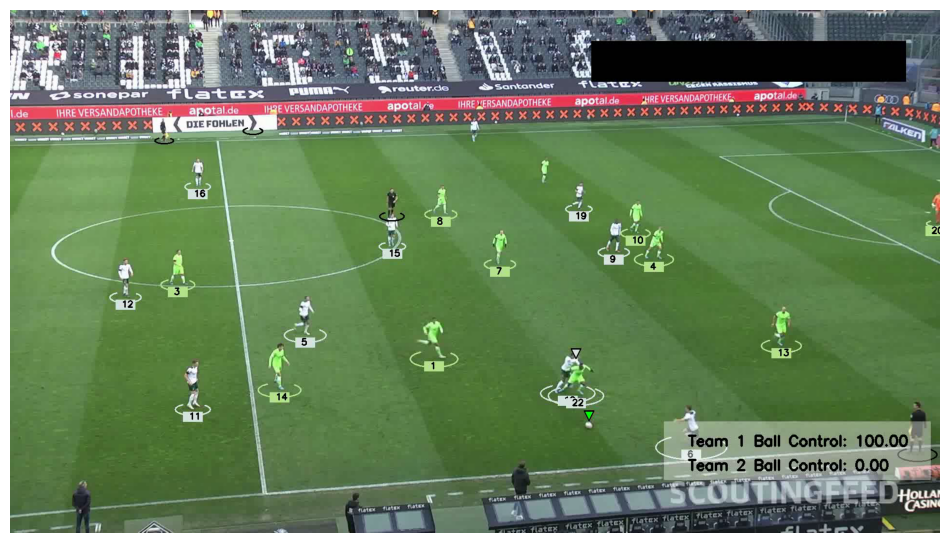

In [25]:
final_video = os.path.join(ROOT_DIR, 'output_videos/08fd33_4.avi')
capture_frame(final_video)

#**6. Extra**

Nesta se√ß√£o, vamos elucidar o processo de utiliza√ß√£o do algoritmo de clustering K-Means para identificar e atribuir cores √†s camisas dos atletas. Que ir√° nos apoiar no agrupamento de dados n√£o rotulados. Neste caso, utilizaremos para discernir as cores das camisas dos jogadores.

Para isso, precisamos da imagem de um jogador, ent√£o vamos utilizar algumas fun√ß√µes criadas anterioremente que identifica um jogador, e cortar a imagem com as coordenadas do bounding box.

In [26]:
#Salvando um corte da imagem representando um player
for track_id, player in tracks['players'][0].items():
  bounding_box = player['bounding_box']
  frame = video_frames[0]

  #Cortando o bounding box do frame
  cropped_image = frame[int(bounding_box[1]):int(bounding_box[3]), int(bounding_box[0]):int(bounding_box[2])]

  # salvando a imagem cortada
  cv2.imwrite((ROOT_DIR + '/output_videos/cropped_image.jpg'), cropped_image)
  break

Aqui estamos plotando a imagem recortada, e convertendo as cores para RGB.

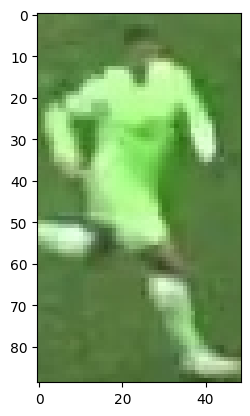

In [27]:
image_path = ROOT_DIR + '/output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

√â consenso que a parte superior do bounding box corresponde √† regi√£o da camisa do jogador em jogo. Portanto, vamos dividir a imagem ao meio e utilizar apenas essa por√ß√£o superior para an√°lise.

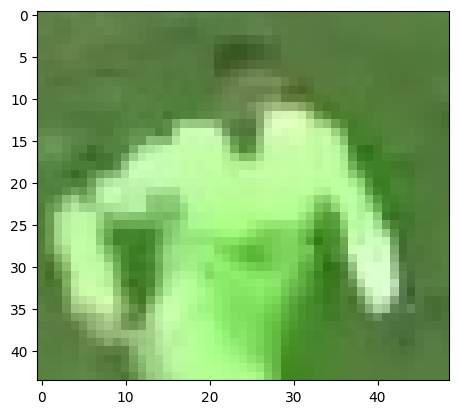

In [28]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)

Certo, agora vamos extrair a cor predominante nessa regi√£o da imagem. No entanto, surge um problema: a cor de fundo ser√° mais abundante do que a cor da camisa do jogador. Portanto, precisamos segmentar essa imagem ou remover o fundo de alguma maneira. Vamos dividir a imagem em dois grupos (clusters).

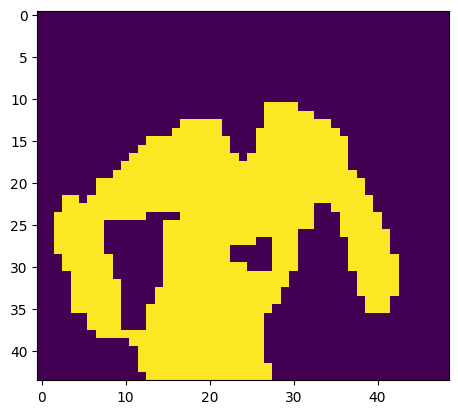

In [29]:
# primeiro vamos transforma-la em um array 2d
top_half_image_2d = top_half_image.reshape((-1, 3))

# Agora vamos aplicar o KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(top_half_image_2d)

# Capturar os labels do cluster
labels = kmeans.labels_

#remontar os labels no formato original da imagem
clustered_top_half_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#visualizando o resultado
plt.imshow(clustered_top_half_image)

E como vamos distinguir o que o algoritmo K-means classificou como 0 ou 1?

Para isso, vamos usar os valores dos v√©rtices da imagem, que na maioria das vezes ser√£o preenchidos com a cor de fundo.

In [30]:
corner_clusters =[clustered_top_half_image[0, 0],
                  clustered_top_half_image[0, -1],
                  clustered_top_half_image[-1, 0],
                  clustered_top_half_image[-1, -1]]

non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

print(non_player_cluster)

0


In [31]:
#entao, basta somarmos 1 ao valor, para obtermos o valor do player
player_cluster = non_player_cluster + 1

print(player_cluster)

1


In [32]:
kmeans.cluster_centers_[player_cluster]

array([     171.38,      235.65,      142.85])

#**Conclus√£o**

Ao longo deste MVP, desenvolvemos um sistema de an√°lise de v√≠deo para rastreamento de objetos. Utilizando t√©cnicas de vis√£o computacional e aprendizado de m√°quina, conseguimos identificar e acompanhar jogadores, √°rbitros e a bola em tempo real durante uma partida de futebol.

Por meio da integra√ß√£o do modelo YOLO para detec√ß√£o de objetos e a aplica√ß√£o do algoritmo K-means para segmenta√ß√£o de cores, conseguimos atribuir cores de camisa aos jogadores, facilitando a identifica√ß√£o de suas equipes. Al√©m disso, implementamos m√©todos para determinar a posse de bola com base na proximidade dos jogadores ao objeto em movimento.

O sistema demonstrou sua capacidade de produzir resultados visualmente informativos, oferecendo uma perspectiva valiosa sobre o desempenho das equipes e a din√¢mica do jogo. No entanto, h√° diversas oportunidades para melhorias e expans√µes futuras.

Al√©m disso, podemos de enriquecer a base de dados com imagens de jogos brasileiros, considerando as peculiaridades clim√°ticas e de ilumina√ß√£o distintas, como partidas realizadas durante o dia com varia√ß√µes de luminosidade devido √† sombra ou √† incid√™ncia direta do sol. A aplica√ß√£o de t√©cnicas de data augmentation tamb√©m pode contribuir para a robustez do sistema, permitindo uma maior diversidade de cen√°rios e condi√ß√µes de jogo.

Outra √°rea promissora de desenvolvimento √© a implementa√ß√£o do reconhecimento dos n√∫meros das camisas dos jogadores, similar ao exemplo apresentado em aula, para uma identifica√ß√£o mais precisa e individualizada dos atletas. Esses dados podem ser associados √†s estat√≠sticas das partidas, fornecendo insights adicionais sobre o desempenho de cada jogador ao longo do jogo e ao longo da temporada.

Al√©m disso, a utiliza√ß√£o de keypoints para mapear o campo e acompanhar o posicionamento dos jogadores em tempo real, proporcionando uma representa√ß√£o visual em um mini quadro t√°tico, pode agregar uma nova camada de an√°lise e compreens√£o t√°tica do jogo, similar √†s interfaces de videogames.

Essas s√£o apenas algumas das muitas ideias de aprimoramento e expans√£o que podem ser exploradas neste projeto, destacando seu potencial para evoluir e se adaptar √†s demandas e oportunidades em constante mudan√ßa no cen√°rio esportivo.

Em suma, este projeto demonstra o potencial das tecnologias de vis√£o computacional e aprendizado de m√°quina na an√°lise de eventos esportivos, oferecendo uma base para futuras pesquisas e desenvolvimentos nessa √°rea.